<a href="https://colab.research.google.com/github/Patrick-B4/DataScienceExercises/blob/main/PatrickB_Exploratory_Data_Analysis_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis Exercise

Explore the NYC Airbnb dataset. Write code to get insights on the NYC Airbnb dataset. Write code to answer the following code

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
# Helper code

# Create line graph
plt.plot(x, y)
plt.show()

# Create a scatter plot
plt.scatter(x, y)
plt.show()

# Create a histogram
plt.hist(x, bins=10)
plt.show()

# Create a bar plot
plt.bar(x, names=x_names)
plt.show()

In [ ]:
# Load the dataset
ab_df = pd.read_csv("/content/sample_data/AB_NYC_2019.csv")
ab_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Warm up tasks

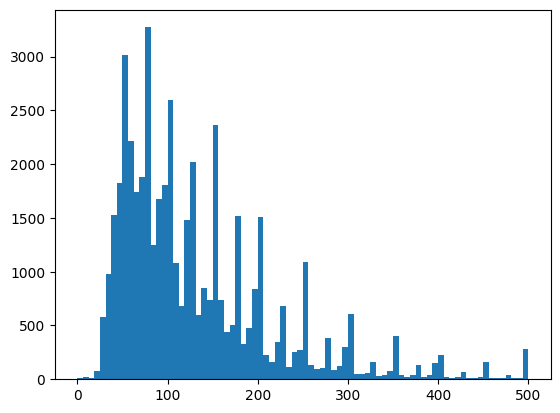

In [ ]:
# Create a histogram of price
plt.hist(ab_df["price"],range = [0,500], bins=80)
plt.show()

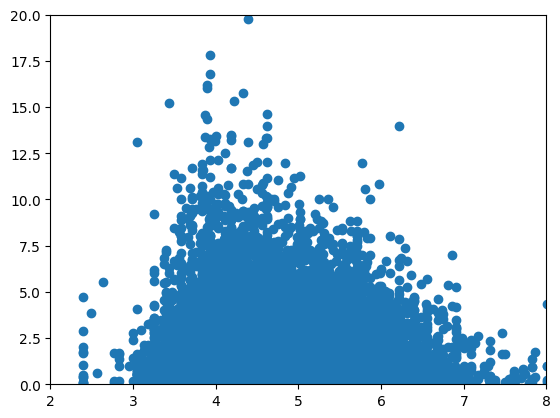

In [ ]:
# Plot the relationship between reviews per month and price
ab_df["log_price"] = np.log(ab_df["price"]+1)
plt.scatter(ab_df["log_price"],ab_df["reviews_per_month"])
plt.xlim(2,8)
plt.ylim(0,20)
plt.show()

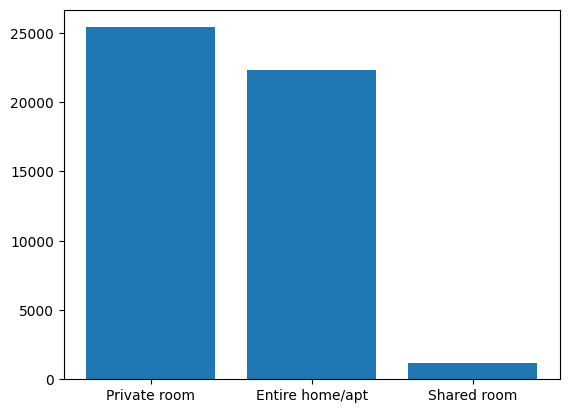

In [ ]:
# Create a bar plot of the room type
plt.bar(ab_df["room_type"].unique(), ab_df["room_type"].value_counts())
plt.show()

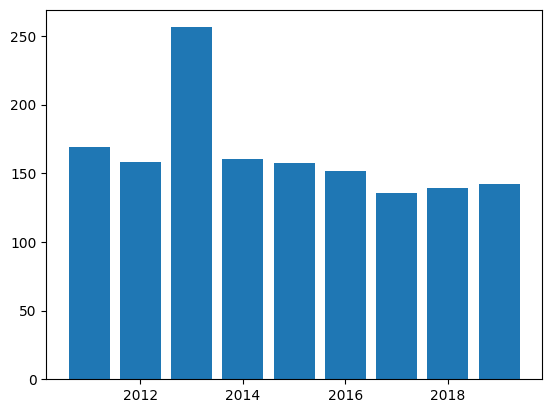

In [ ]:
# Create a bar plot for the average price for each year
ab_df["year"] = pd.to_datetime(ab_df["last_review"]).dt.year
average_prince = ab_df.groupby("year")["price"].mean()
plt.bar(average_prince.index, average_prince)
plt.show()

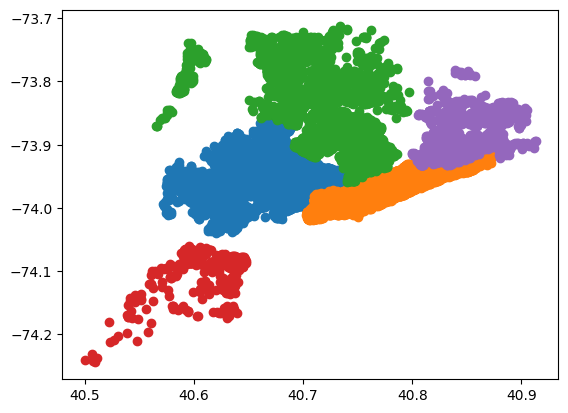

In [ ]:
# Create a scatter plot of locations of listings using geo coordinates color coded by neighbourhood group
ab_df["neighbourhood_group"].unique()

for n_group in ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']:
  sub_df = ab_df[ab_df["neighbourhood_group"] == n_group ]
  plt.scatter(sub_df["latitude"],sub_df["longitude"])


plt.show()

### Exploration questions

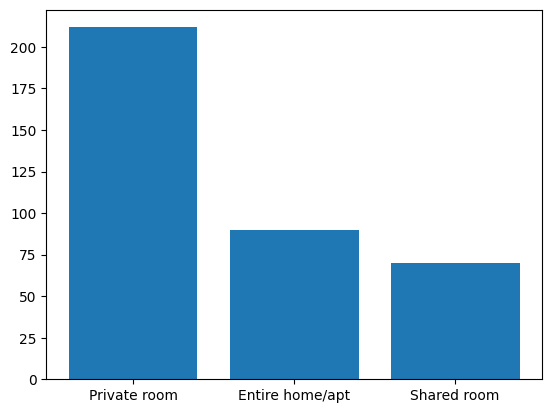

In [ ]:
# How does the average price differ between various room types?
plt.bar(ab_df["room_type"].unique(), ab_df.groupby("room_type")["price"].mean())
plt.show()

In [ ]:
# What is the distribution of rental prices across different neighborhoods?
summary_stats = ab_df.groupby('neighbourhood')['price'].describe()
print(summary_stats)

                 count        mean         std    min     25%    50%     75%  \
neighbourhood                                                                  
Allerton          42.0   87.595238   73.048617   33.0   47.00   66.5  104.75   
Arden Heights      4.0   67.250000   18.300729   41.0   62.75   72.5   77.00   
Arrochar          21.0  115.000000  133.119120   32.0   34.00   65.0  125.00   
Arverne           77.0  171.779221  193.347902   35.0   75.00  125.0  200.00   
Astoria          900.0  117.187778  349.898287   25.0   60.00   85.0  120.00   
...                ...         ...         ...    ...     ...    ...     ...   
Windsor Terrace  157.0  138.993631   84.630532   38.0   77.00  123.0  160.00   
Woodhaven         88.0   67.170455   40.527335   10.0   45.00   52.0   70.25   
Woodlawn          11.0   60.090909   19.821476   29.0   42.50   68.0   73.50   
Woodrow            1.0  700.000000         NaN  700.0  700.00  700.0  700.00   
Woodside         235.0   85.097872   70.

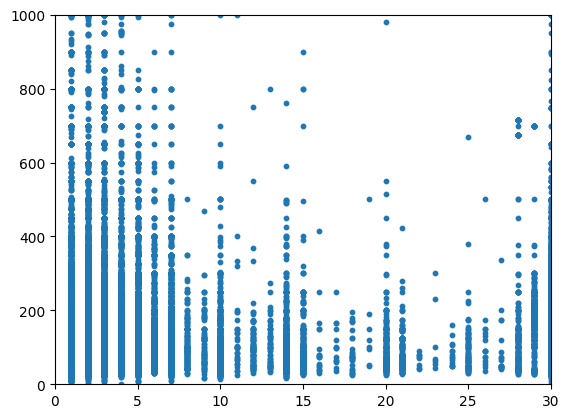

In [ ]:
# How does the minimum number of nights required impact the price of listings?
plt.scatter(ab_df["minimum_nights"], ab_df["price"], s=10)
plt.xlim(0,30)
plt.ylim(0,1000)
plt.show()



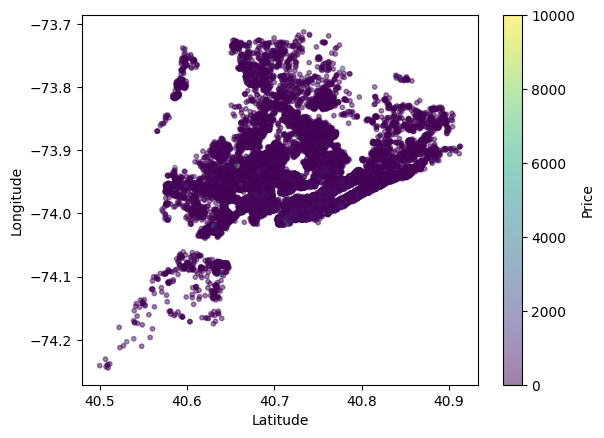

In [ ]:
# How does the geographic distribution of listings correlate with prices?
plt.scatter(ab_df["latitude"], ab_df["longitude"], c=ab_df["price"],alpha = 0.5, s=10)
plt.colorbar(label='Price')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Exploration

Generate several more stats and plots and try to identify as many instances of the following as you can...
1. Groups or clusters that are not explicit
2. Anomalous, outliers, or unusual values
3. Potential associations or trends (over the years for example)

For the exploration questions my main goal was to create various plots to see if there is any relationships that I could find between the data. One pattern which I noticed was that when it comes to room type is that the prices for private rooms and entire homes is higher than the shared room which makes sense. However the private room seems to have a higher cost than the entire home which might be due to some outliers or there may be more private rooms available in the city rather than whole appartments. Besides that it was difficult for me to find relationships I noticed some neighborhoods like Astoria have disproportianlly higher prices however I'm not sure why that is.

Overall, this exercise was a lot more challenging than what I am used to. However, it is interesting when things go well.